In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
movie_data = pd.read_csv('/Users/mucheng/Datasets/Song_List_Data_Collection.csv')
movie_data.head()

,Name,Name_of_Artist,Number_of_Singers,Vocal_Gender,Language,Length_of_Time,Genre,Liked
0,Tití Me Preguntó,Bad Bunny,1,Male,Spanish,290,Latin Urbano,NO
1,Golden Hour,JVKE,1,Male,English,217,Pop,YES
2,Golden Hour,JVKE,1,Male,English,217,Alternative/Indie,YES
3,Hold Me Closer,"Elton John, Britney Spears",2,Mixed,English,203,Alternative/Indie,YES
4,Hold Me Closer,"Elton John, Britney Spears",2,Mixed,English,203,Dance/Electronic,YES


## 2. Organize Data

In [11]:

def split_test_train_datasets(csv_file, test_size_percent):
    X = csv_file
    X = X.iloc[np.random.permutation(X.index)].reset_index(drop=True)
    train_ds, test_ds = train_test_split(X, test_size=test_size_percent,random_state=3)
    name_test_csv = "test_csv"
    name_train_csv = "train_csv"
    train_csv = train_ds.to_csv(name_train_csv,index=False)
    test_csv = test_ds.to_csv(name_test_csv,index=False)
    
    percent_test_sample = test_size_percent * 100.0
    num_test_sample = len(test_ds.index)
    percent_train_sample = (1 - test_size_percent) * 100.0
    num_train_sample = len(train_ds.index)

    
    print("Data Info Breakdown: " + "\n" +
         "Percent of Data in the Test Set: " + str(percent_test_sample) + " %" + "\n" +
          "Number of Data Samples in the Test Set: " + str(num_test_sample) + "\n" +
          "Percent of Data in the Training Set: " + str(percent_train_sample) + " %" + "\n" +
          "Number of Data Samples in the Training Set: " + str(num_train_sample) + "\n" + 
          "Name of the Test CSV File: " + name_test_csv + "\n" +
          "Name of the Training CSV File: " + name_train_csv)
#     print(pd.read_csv("train_csv"))
#     print(pd.read_csv("test_csv"))
#     print(train_ds)
#     print(test_ds)


    
    

In [12]:
split_test_train_datasets(movie_data, 0.4)

Data Info Breakdown: 
Percent of Data in the Test Set: 40.0 %
Number of Data Samples in the Test Set: 45
Percent of Data in the Training Set: 60.0 %
Number of Data Samples in the Training Set: 67
Name of the Test CSV File: test_csv
Name of the Training CSV File: train_csv


## 3. Plot Data

In [8]:
movie_data.head()

,Number_of_Singers,Vocal_Gender,Language,Length_of_Time,Number_of_YouTube_Clicks,Billboard_Rank_at_Peak
0,1,Male,Spanish,290,635.0,5
1,1,Male,English,217,7.8,62
2,2,Mixed,English,203,8.8,6
3,2,Male,Spanish,202,385.0,6
4,1,Male,English,153,6.4,48


Plot#1: Name vs Liked

<AxesSubplot:xlabel='Name'>

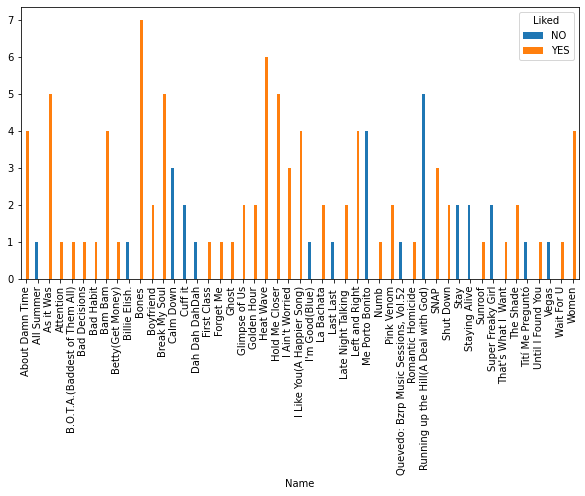

In [298]:
CrosstabResult=pd.crosstab(index=movie_data['Name'],columns=movie_data['Liked'])
CrosstabResult.plot.bar(figsize=(10,5),rot=90)

<BarContainer object of 112 artists>

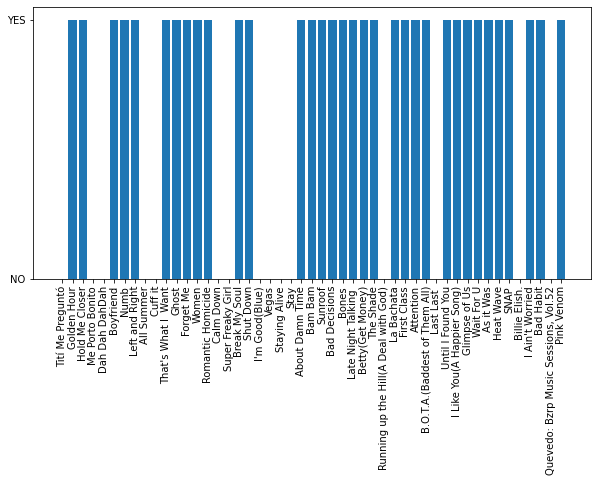

In [286]:
feature_1 = movie_data.Name
feature_dependent = movie_data.Liked
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar(feature_1,feature_dependent)


Plot#2: Name of Artist vs Liked

<AxesSubplot:xlabel='Name_of_Artist'>

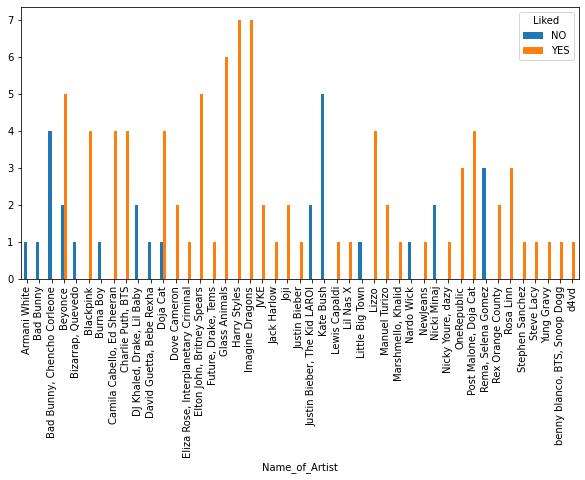

In [297]:
CrosstabResult=pd.crosstab(index=movie_data['Name_of_Artist'],columns=movie_data['Liked'])
CrosstabResult.plot.bar(figsize=(10,5),rot=90)

<BarContainer object of 112 artists>

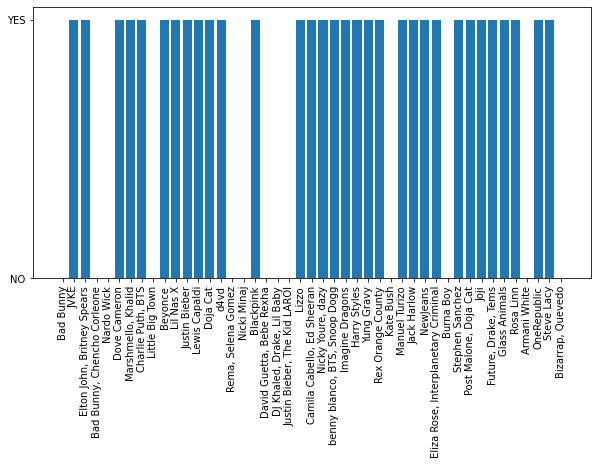

In [287]:
feature_2 = movie_data.Name_of_Artist
feature_dependent = movie_data.Liked
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar(feature_2,feature_dependent)


Plot#3: Number of Singers vs Liked

<AxesSubplot:xlabel='Number_of_Singers'>

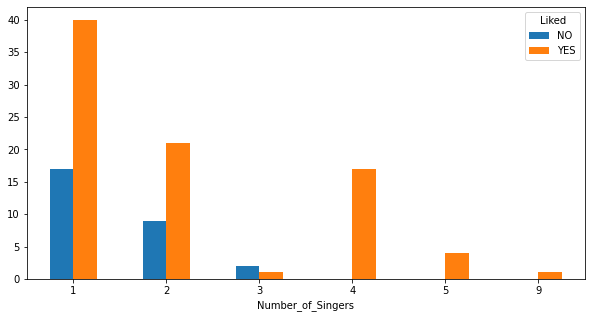

In [295]:
CrosstabResult=pd.crosstab(index=movie_data['Number_of_Singers'],columns=movie_data['Liked'])
CrosstabResult.plot.bar(figsize=(10,5),rot=0)

<BarContainer object of 112 artists>

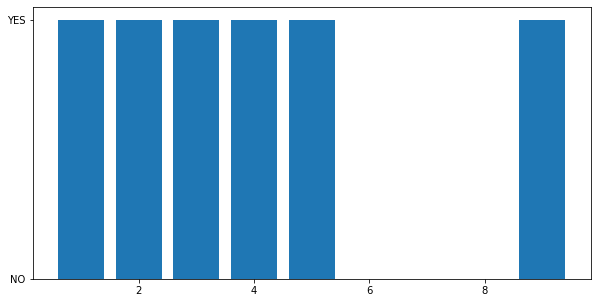

In [288]:
feature_3 = movie_data.Number_of_Singers
feature_dependent = movie_data.Liked
plt.figure(figsize=(10,5))
# plt.xticks(rotation='vertical')
plt.bar(feature_3,feature_dependent)

Plot#4: Vocal Gender vs Liked

In [260]:
movie_data_subset.head()

,Name,Name_of_Artist,Number_of_Singers,Vocal_Gender,Language,Liked
0,Tití Me Preguntó,Bad Bunny,1,Male,Spanish,NO
1,Golden Hour,JVKE,1,Male,English,YES
3,Hold Me Closer,"Elton John, Britney Spears",2,Mixed,English,YES
8,Me Porto Bonito,"Bad Bunny, Chencho Corleone",2,Male,Spanish,NO
12,Dah Dah DahDah,Nardo Wick,1,Male,English,NO


<AxesSubplot:xlabel='Vocal_Gender'>

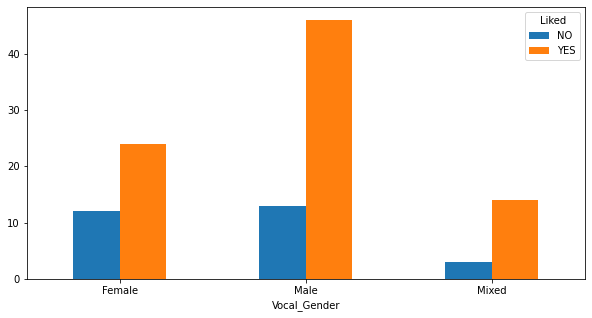

In [294]:
CrosstabResult=pd.crosstab(index=movie_data['Vocal_Gender'],columns=movie_data['Liked'])
CrosstabResult.plot.bar(figsize=(10,5),rot=0)

Plot#5: Language vs Liked

<AxesSubplot:xlabel='Language'>

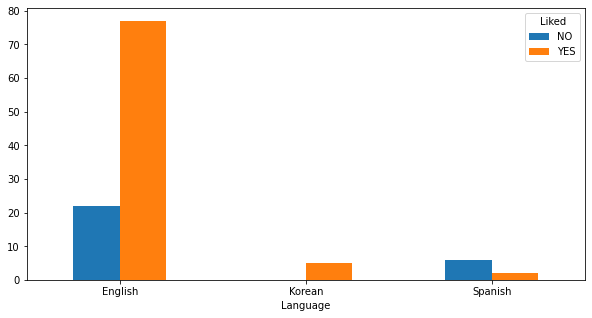

In [293]:
CrosstabResult=pd.crosstab(index=movie_data['Language'],columns=movie_data['Liked'])
CrosstabResult.plot.bar(figsize=(10,5),rot=0)

/var/folders/dw/_3hp0rfn7rngzth_1dc9rh280000gn/T/ipykernel_1814/824334080.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


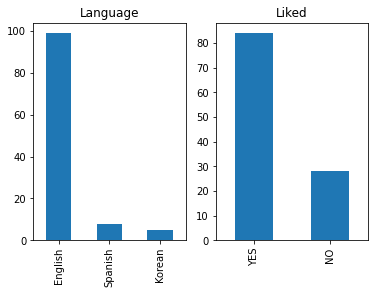

In [292]:
categorical_features = ['Language',"Liked"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(movie_data[categorical_features]):
    movie_data[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

## 4. Execute a linear regression for each independent variable

